<a href="https://colab.research.google.com/github/lavanya-mlds/sales-price-prediction/blob/main/Advertising_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

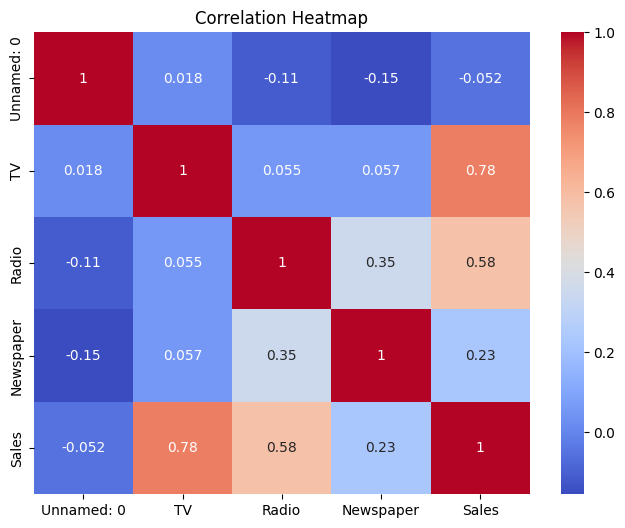

MAE: 1.4607567168117603
MSE: 3.1740973539761033
RMSE: 1.78159966153345
R2 Score: 0.899438024100912


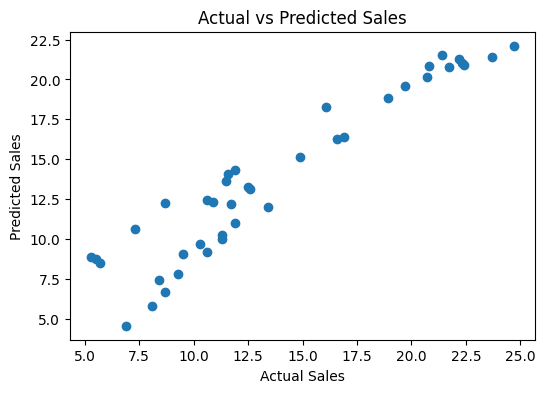

Predicted Sales: 21.467556973825737


In [ ]:
# ================================
# SALES PREDICTION USING PYTHON
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
data = pd.read_csv("/content/Advertising.csv")   # change filename if needed

# 3. Basic Info
print(data.head())
print(data.info())
print(data.describe())

# 4. Check Missing Values
print(data.isnull().sum())

# 5. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6. Split Features and Target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# 7. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Prediction
y_pred = model.predict(X_test)

# 10. Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# 11. Actual vs Predicted Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# 12. Predict New Sales Value
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [50],
    'Newspaper': [30]
})

prediction = model.predict(new_data)
print("Predicted Sales:", prediction[0])


In [ ]:
# ================================
# SALES PREDICTION WITH USER INPUT
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Advertising.csv")

# Split features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# ================================
# USER INPUT SECTION 🔥
# ================================

print("\nEnter Advertisement Spendings:")

tv = float(input("Enter TV advertisement spend: "))
radio = float(input("Enter Radio advertisement spend: "))
newspaper = float(input("Enter Newspaper advertisement spend: "))

# Create input dataframe
user_input = pd.DataFrame({
    'TV': [tv],
    'Radio': [radio],
    'Newspaper': [newspaper]
})

# Prediction
predicted_sales = model.predict(user_input)

print("\n📈 Predicted Sales:", predicted_sales[0])




Enter Advertisement Spendings:
Enter TV advertisement spend: 100
Enter Radio advertisement spend: 50
Enter Newspaper advertisement spend: 20

📈 Predicted Sales: 16.96699408354043
